# NAIVE BAYERS ASSIGNMENT

# 1) Prepare a classification model using Naive Bayes for salary data 


In [1]:
import pandas as pd
import numpy as np

In [2]:
salary_test=pd.read_csv("SalaryData_Test.csv")
salary_train=pd.read_csv("SalaryData_Train.csv")

In [3]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA 

In [5]:
salary_train.shape


(30161, 14)

In [6]:
salary_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
salary_train.isna().sum()


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
salary_train.describe()


,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
salary_test.shape


(15060, 14)

In [10]:
salary_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [11]:
salary_test.isna().sum()


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
salary_test.describe()


,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [13]:
from sklearn.preprocessing import LabelEncoder


In [14]:
le = LabelEncoder()


In [15]:
col1 = salary_train.columns[salary_train.dtypes == "object"]
col1

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [16]:
for i in col1:
    salary_train[i] = le.fit_transform(salary_train[i])

In [17]:
col2 = salary_test.columns[salary_test.dtypes == "object"]
col2

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [18]:
for i in col2:
    salary_test[i] = le.fit_transform(salary_test[i])

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

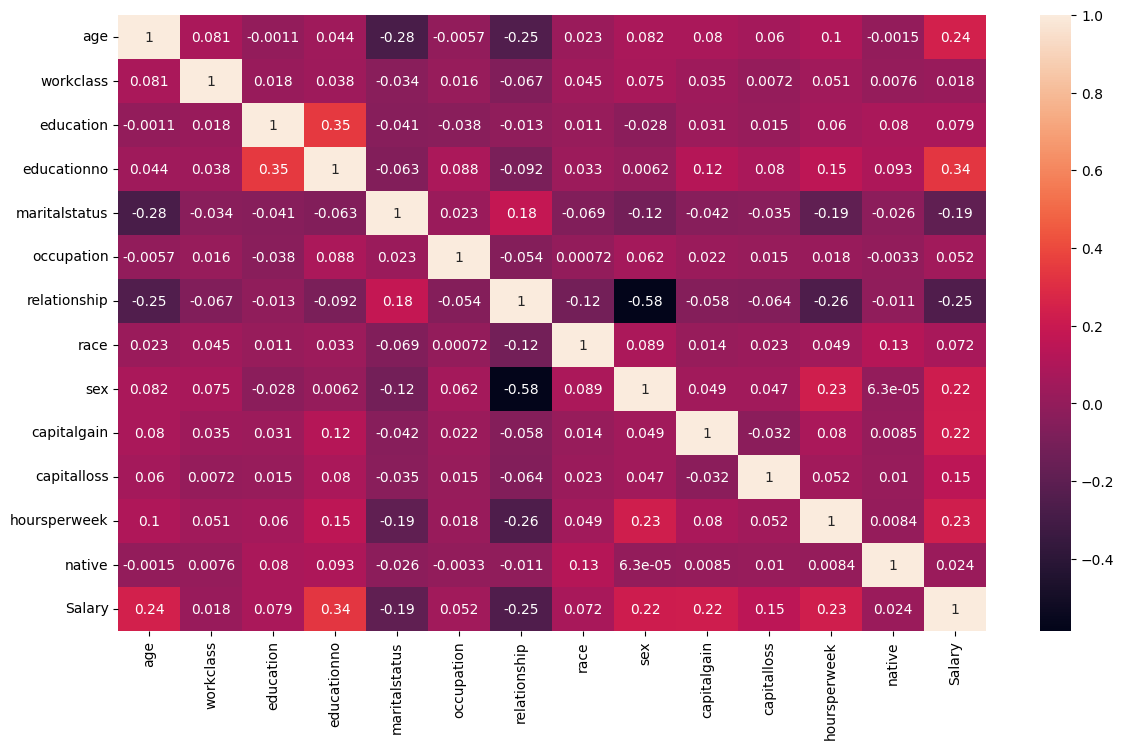

In [20]:
plt.figure(figsize = (14,8))
sns.heatmap(salary_train.corr(),annot = True)
plt.show()

Skew: -0.32099937243135945
Kurtosis: 0.6184678428156434


C:\Users\naveenkumar\AppData\Local\Temp\ipykernel_18552\698433424.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(salary_test['educationno'],shade=True,color='g')


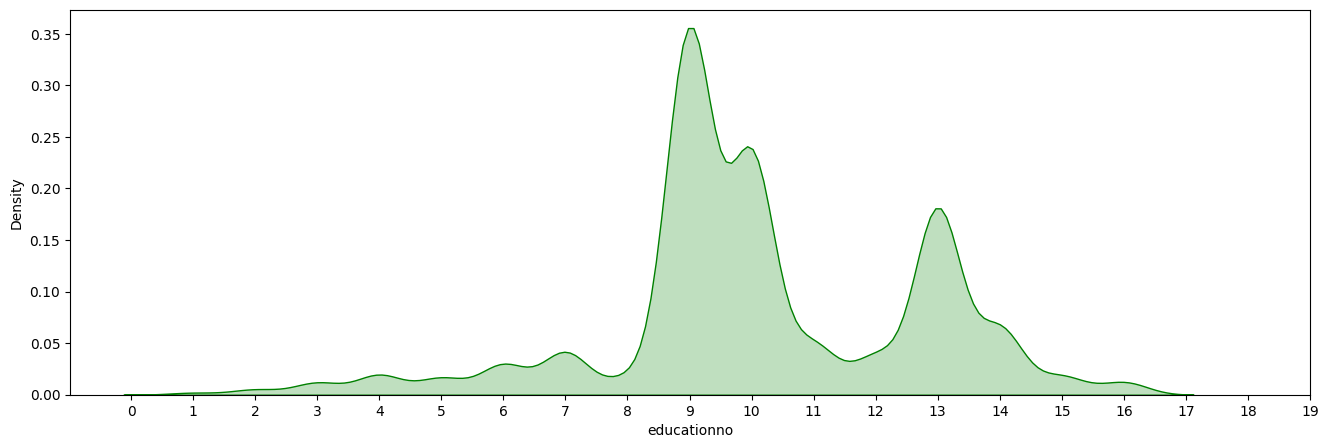

In [23]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(salary_test['educationno'].skew()))
print("Kurtosis: {}".format(salary_test['educationno'].kurtosis()))
ax = sns.kdeplot(salary_test['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

The Data is negatively skewed and has low kurtosis value
Most of people have eduction Number of years of education 8 - 11

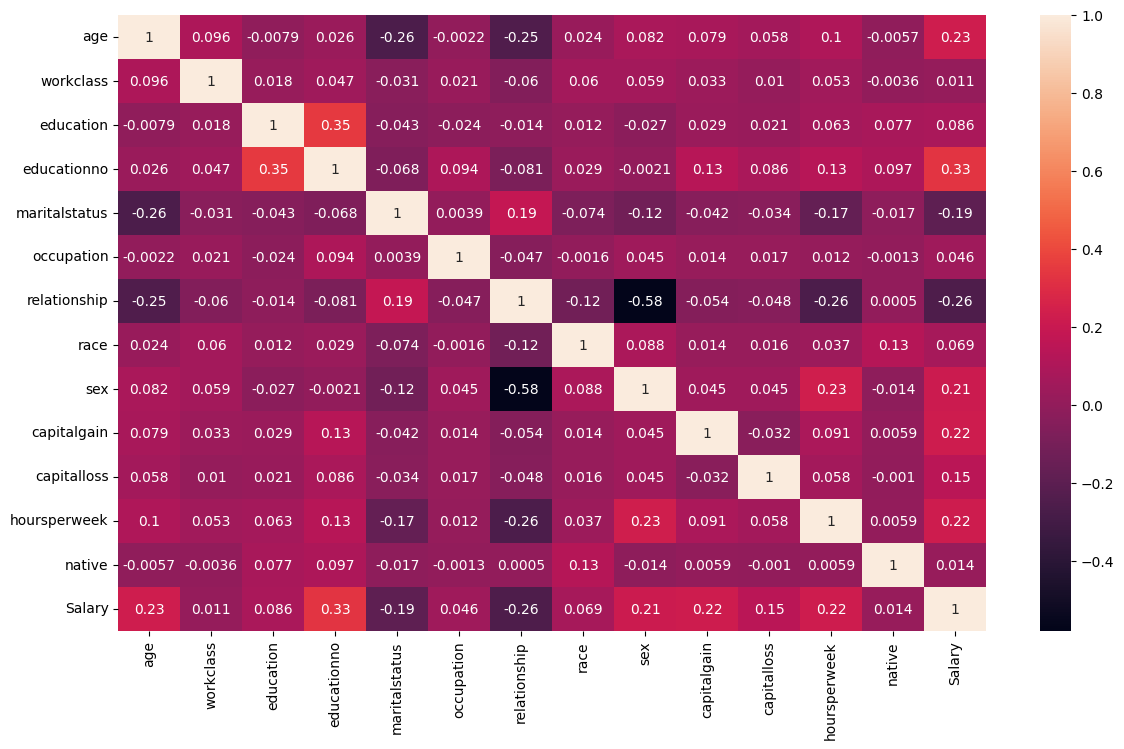

In [24]:
plt.figure(figsize = (14,8))
sns.heatmap(salary_test.corr(),annot = True)
plt.show()

In [26]:
xtrain = salary_train.iloc[:, :-1]
ytrain = salary_train['Salary']

In [27]:
xtest = salary_test.iloc[:, :-1]
ytest = salary_test['Salary']

In [28]:
xtrain.shape, ytrain.shape


((30161, 13), (30161,))

In [29]:
xtest.shape, ytest.shape


((15060, 13), (15060,))

In [30]:
from sklearn.naive_bayes import MultinomialNB


In [31]:
mb = MultinomialNB()


In [32]:
mb.fit(xtrain, ytrain)
ypred = mb.predict(xtest)

print('Testing accuracy is', mb.score(xtrain, ytrain))
print('Training accuracy is',mb.score(xtest, ytest))

Testing accuracy is 0.7729186698053778
Training accuracy is 0.7749667994687915
